In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.1.6'

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Let's have a look at the test data:

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

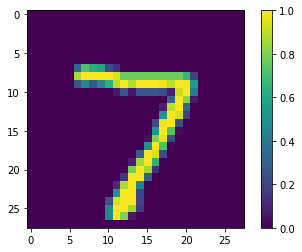

In [9]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

A = test_images[:1,]
A = np.asmatrix(A)/255

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.imshow(A, interpolation='nearest', cmap=plt.cm.ocean)
plt.imshow(A)
plt.colorbar()

In [10]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [11]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [12]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [13]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [14]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.2543 - acc: 0.9254
Epoch 2/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.1037 - acc: 0.9694
Epoch 3/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.0679 - acc: 0.9797
Epoch 4/5
60000/60000 [==============================] - 4s 64us/step - loss: 0.0497 - acc: 0.9854
Epoch 5/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.0373 - acc: 0.9889


In [15]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 46us/step


In [18]:
print('test_acc:', test_acc)
print('test_loss:', test_loss)

test_acc: 0.9792
test_loss: 0.06592974876000081
